In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [139]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 2 
t = 1000
d = 2
to_d = 10
a = 1

In [140]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 3.14159265])

In [141]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [0, 0]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

def rotation(data, seed = 42, d = to_d):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    random_rotation_matrix = special_ortho_group.rvs(to_d)
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

def rotation_matrix(matrix, degree):
    deg = np.radians(degree)
    rotation_operation = np.array([[np.cos(deg), -np.sin(deg)], [np.sin(deg), np.cos(deg)]])
    product = rotation_operation @ matrix
    return product

In [142]:
data = np.zeros((c, d, t))



In [143]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[0, 0]
[0, 0]


In [144]:
for i in range(t):
    if i == 0:
        continue
    data[0, :, i] = rotation_matrix(data[0, :, i-1], 1)* 1.001 + np.random.normal(0, 0.01, (1, d))
    data[1, :, i] = rotation_matrix(data[1, :, i-1], -1)* 1.001 + np.random.normal(0, 0.01, (1, d))

Text(0.5, 0, 'Time')

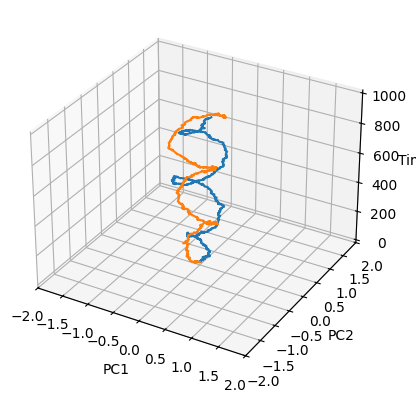

In [145]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(data[i, 0, :], data[i, 1, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')



In [146]:
new_data = transformation_to_n_dim(data, d, to_d)
new_data.shape

(2, 10, 1000)

In [147]:
new_data[0, :, 2]

array([ 0.00519059, -0.02286145,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [148]:
rotated = rotation(new_data)

In [149]:
rotated.shape

(2, 10, 1000)

In [150]:
rotated[0, :, 2]

array([-0.00109052,  0.00972354, -0.01014704, -0.00116325,  0.00499382,
       -0.00535691,  0.014221  , -0.0087259 , -0.00317936,  0.00272302])

Text(0.5, 0, 'Time')

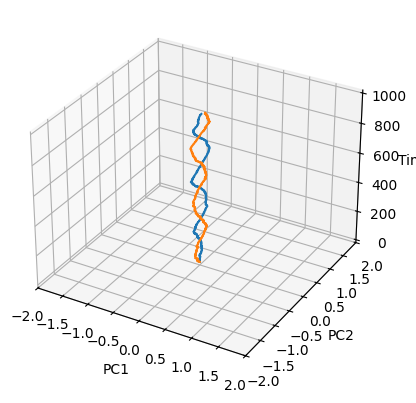

In [151]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(rotated[i, 3, :], rotated[i, 2, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')


Text(0.5, 0, 'Time')

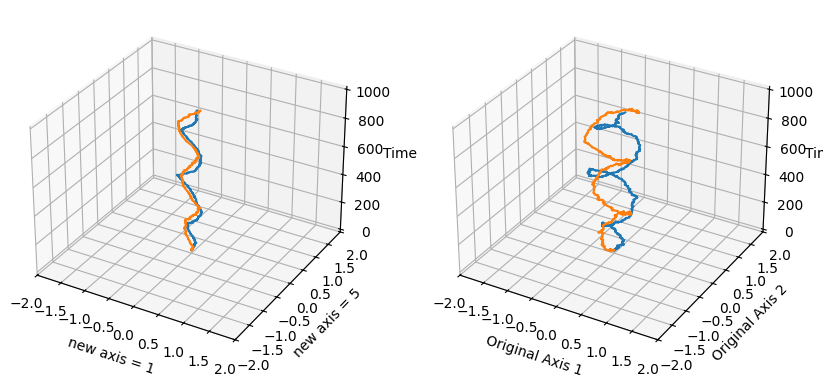

In [152]:
rotated_axis_a = 1
rotated_axis_b = 5

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# ax[0] = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax[0].plot(rotated[i, rotated_axis_a, :], rotated[i, rotated_axis_b, :], range(t))

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('new axis = ' + str(rotated_axis_a))
ax[0].set_ylabel('new axis = ' + str(rotated_axis_b))
ax[0].set_zlabel('Time')

# ax[1] = plt.figure().add_subplot(projection='3d')
for i in range(c):
    ax[1].plot(data[i, 0, :], data[i, 1, :], range(t))

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original Axis 1')
ax[1].set_ylabel('Original Axis 2')
ax[1].set_zlabel('Time')


Text(0.5, 0, 'Original axis 1-2')

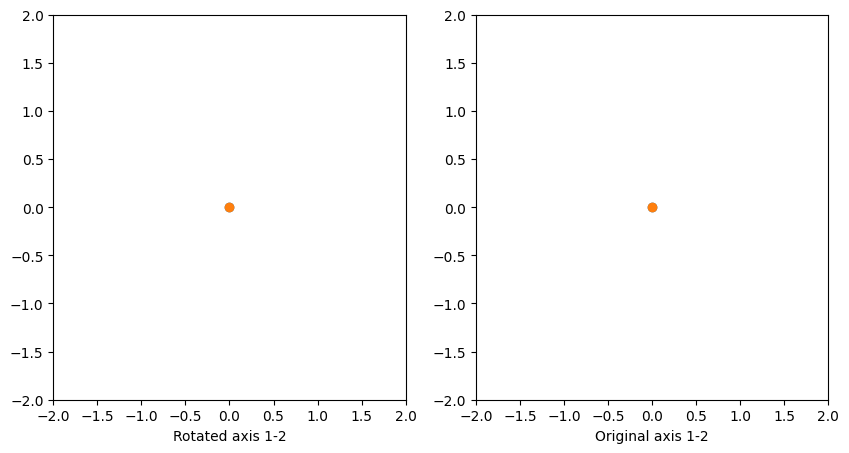

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(c):
    ax[0].scatter(rotated[i, 0, 0], rotated[i, 1, 0])
    ax[1].scatter(data[i, 0, 0], data[i, 1, 0])

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('Rotated axis 1-2')

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original axis 1-2')

IndexError: index 2 is out of bounds for axis 0 with size 2

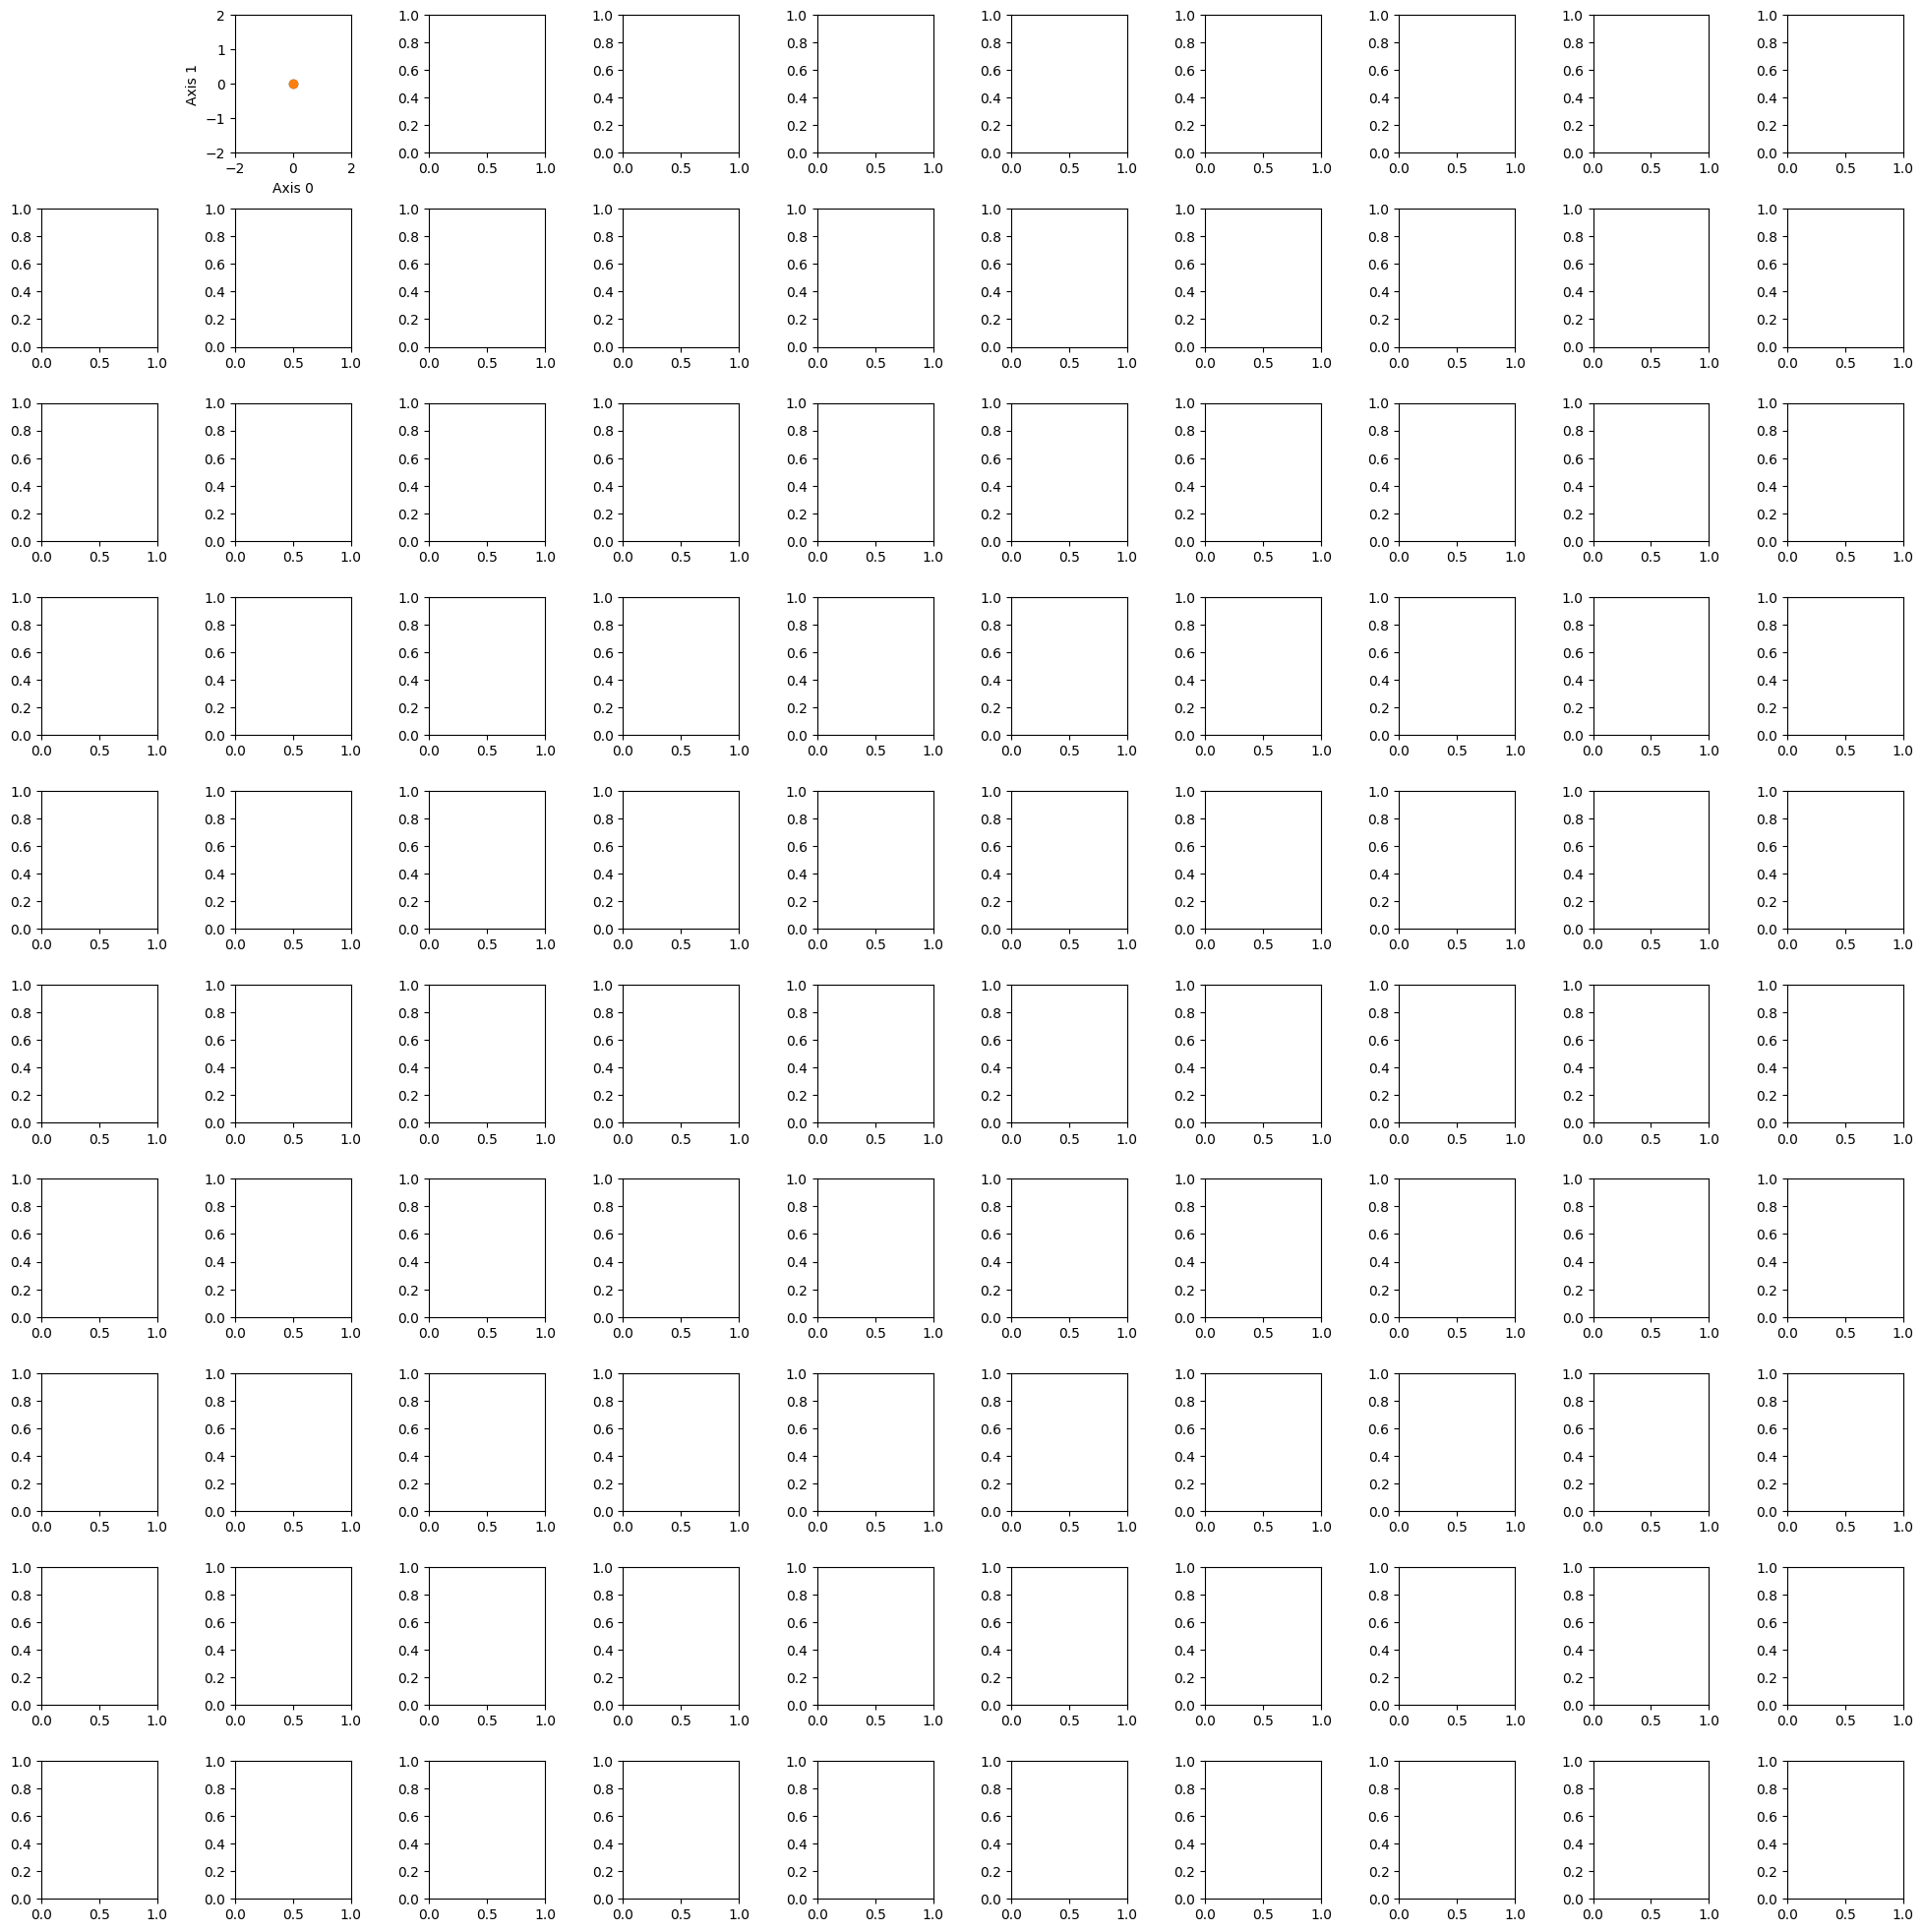

In [154]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=2.0)


for i in range(10):
    for j in range(10):
        for k in range(6):
            if i != j:
                ax[i, j].scatter(rotated[k, i, 0], rotated[k, j, 0])
                ax[i, j].set_xlim([-2, 2])
                ax[i, j].set_ylim([-2, 2])
                ax[i, j].set_xlabel(f'Axis {i}')
                ax[i, j].set_ylabel(f'Axis {j}')
            else:
                ax[i, j].axis('off')  # Turn off the diagonal subplots

plt.show()

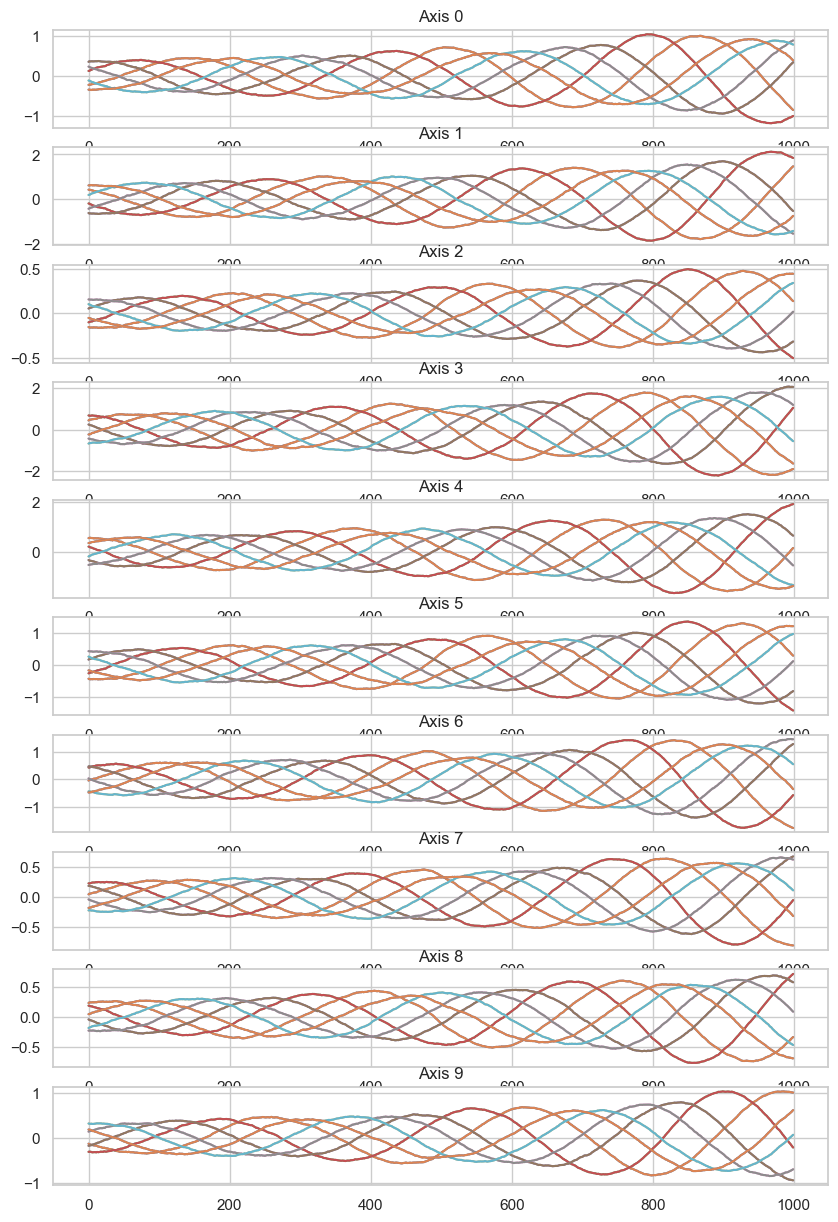

In [ ]:
fig, ax = plt.subplots(10, 1, figsize=(10, 15))
for i in range(10):
    for j in range(6):
        ax[i].plot(rotated[j, i, :])
        ax[i].plot(rotated[j, i, :])
        ax[i].set_title(f'Axis {i}')

In [ ]:
c

6

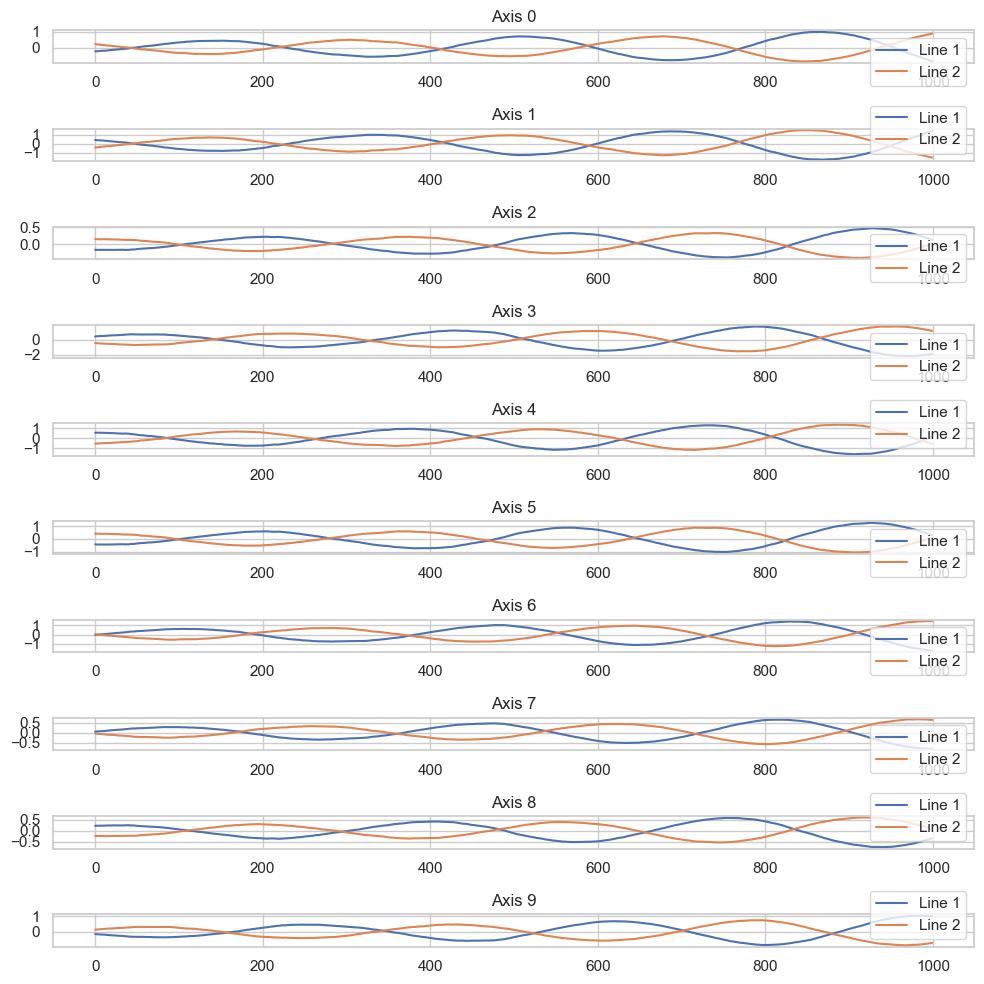

In [ ]:
sns.set(style="whitegrid")

# Create the subplots
fig, axes = plt.subplots(10, 1, figsize=(10, 10))  # Adjusted the height for better spacing

# Plot the data
for i in range(10):
    sns.lineplot(data=rotated[0, i, :], ax=axes[i], label='Line 1')
    sns.lineplot(data=rotated[3, i, :], ax=axes[i], label='Line 2')
    axes[i].set_title(f'Axis {i}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
rotated.shape

(6, 10, 1000)

In [ ]:
np.save('../../Data/rotated.npy', rotated)

In [ ]:
def create_spiral_rotation_in_nd(c, d, t, theta, to_d):
    data = np.zeros((c, d, t))
    for i in range(c):
        data[i, :, 0] = find_coords(theta, i)

    for i in range(t):
        if i == 0:
            continue
        for j in range(c):
            data[j, :, i] = rotation_matrix(data[j, :, i - 1], 1) + np.random.normal(
                0, 0.01, (1, d)
            )

    new_data = transformation_to_n_dim(data, d, to_d)
    rotated = rotation(new_data)

    return new_data, rotated

In [ ]:
new_data, new_rotation = create_spiral_rotation_in_nd(c, d, t, theta, to_d)
new_rotation.shape

(6, 10, 1000)

In [ ]:
new_rotation[0, 0, :]

array([ 0.2705264 ,  0.26436148,  0.26580491,  0.26190936,  0.24924978,
        0.2477848 ,  0.24549665,  0.23452398,  0.22839369,  0.22412927,
        0.22156072,  0.21646556,  0.21539326,  0.20787405,  0.20858298,
        0.20090088,  0.19983024,  0.19130759,  0.18819903,  0.18455376,
        0.17539345,  0.17075058,  0.16302401,  0.15431622,  0.1460378 ,
        0.13691541,  0.13589638,  0.12954593,  0.12334088,  0.11692692,
        0.10938159,  0.09829489,  0.09353822,  0.08448028,  0.07483624,
        0.06754302,  0.0638829 ,  0.0553562 ,  0.04716992,  0.04023709,
        0.03455445,  0.03295308,  0.02445606,  0.00921012, -0.00220748,
       -0.01029028, -0.01641355, -0.02871099, -0.02463747, -0.03772529,
       -0.04140598, -0.04334221, -0.05060656, -0.05588687, -0.05940995,
       -0.06046876, -0.06568884, -0.07060441, -0.07462414, -0.08561823,
       -0.08828348, -0.09489203, -0.09561722, -0.10646599, -0.10931421,
       -0.11391629, -0.12540343, -0.12863639, -0.13331527, -0.14

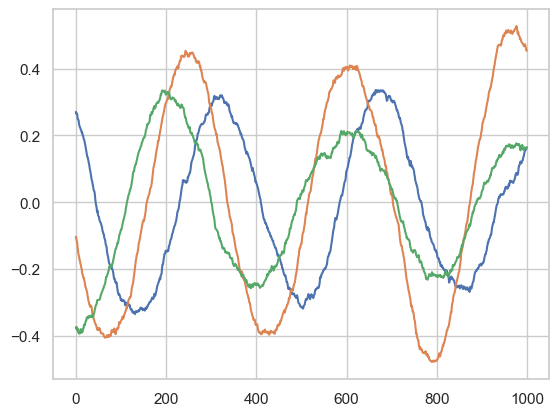

In [ ]:
plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[0, 0, :])
plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[1, 0, :])
plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[2, 0, :])

In [ ]:
new_rotation.shape

(6, 10, 1000)

In [ ]:
# new_rotation

dimension_0 = new_rotation[0, :3, :]
print(dimension_0.shape)

dimension_0_T = dimension_0.T
print(dimension_0_T.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

recovered_2d = pca.fit_transform(dimension_0_T).T



(3, 1000)
(1000, 3)


In [ ]:
recovered_2d.shape

(3, 1000)

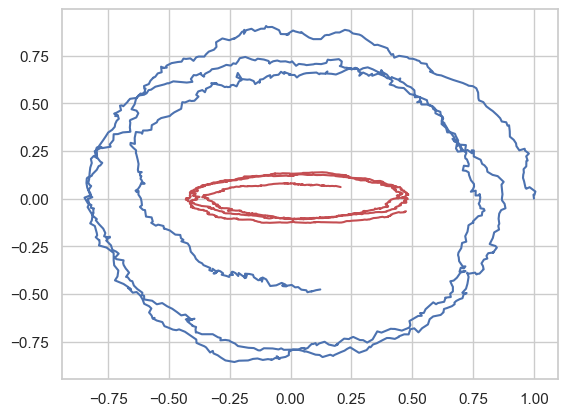

In [ ]:
plt.plot(recovered_2d[0], recovered_2d[1], 'r')
plt.plot(new_data[0, 0, :], new_data[0, 1, :], 'b')